### Build a prediction project in machine learning leverages car sales data, vehicle features,and regression algorithms to estimate the market value of cars.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('quikr_car.csv')

In [3]:
# first five rows
data.head()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [4]:
# last five rows
data.tail()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [5]:
# Shape of data
data.shape

(892, 6)

* Dataset contains 6 rows 892 observations.

In [6]:
# Columns in data
data.columns

Index(['Name of car', 'Company name', 'Year', 'Price', 'Kms driven',
       'Fuel_type'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   892 non-null    object
 1   Company name  892 non-null    object
 2   Year          892 non-null    object
 3   Price         892 non-null    object
 4   Kms driven    840 non-null    object
 5   Fuel_type     837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
# Statistics of data
data.describe()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,270,3
top,Honda City,Maruti,2015,Ask For Price,"45,000",Petrol
freq,13,235,117,35,30,440


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,270,3
top,Honda City,Maruti,2015,Ask For Price,"45,000",Petrol
freq,13,235,117,35,30,440


In [10]:
# Check missing values
data.isnull().sum()

Name of car      0
Company name     0
Year             0
Price            0
Kms driven      52
Fuel_type       55
dtype: int64

* Kms driven,Fuel_type have missing values.

In [11]:
data = data[data['Year'].str.isnumeric()]

In [12]:
data['Year'] = data['Year'].astype(int)

In [13]:
data['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [14]:
data = data[data['Price']!='Ask For Price']

In [15]:
data['Price'] = data['Price'].str.replace(',','').astype(int)

In [16]:
data['Kms driven'].unique()

array(['45,000', '40', '28,000', '36,000', '41,000', '25,000', '24,530',
       '60,000', '30,000', '32,000', '48,660', '4,000', '16,934',
       '43,000', '35,550', '39,522', '39,000', '55,000', '72,000',
       '15,975', '70,000', '23,452', '35,522', '48,508', '15,487',
       '82,000', '20,000', '68,000', '38,000', '27,000', '33,000',
       '46,000', '16,000', '47,000', '35,000', '30,874', '15,000',
       '29,685', '1,30,000 ', '19,000', '54,000', '13,000', '38,200',
       '22,000', '50,000', '13,500', '3,600', '45,863', '60,500',
       '12,500', '18,000', '13,349', '29,000', '44,000', '42,000',
       '14,000', '49,000', '36,200', '51,000', '1,04,000 ', '33,333',
       '33,600', '5,600', '7,500', '26,000 kms', '24,330', '65,480',
       '2,00,000 ', '59,000', '99,000', '2,800', '21,000', '11,000',
       '66,000', '3,000', '7,000', '38,500', '37,200', '43,200', '24,800',
       '45,872', '40,000', '11,400', '97,200', '52,000', '31,000',
       '1,75,430 ', '37,000', '65,000', 

In [17]:
data['Kms driven'] = data['Kms driven'].str.split(' ').str.get(0).str.replace(',','')

In [18]:
data = data[data['Kms driven'].str.isnumeric()]

In [19]:
data['Kms driven']=data['Kms driven'].astype(int)

In [20]:
data[data['Fuel_type'].isna()]

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [21]:
data=data[~data['Fuel_type'].isna()]

In [22]:
data['Name of car']=data['Name of car'].str.split(' ').str.slice(0,3).str.join(' ')

In [23]:
data = data.reset_index(drop=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   816 non-null    object
 1   Company name  816 non-null    object
 2   Year          816 non-null    int32 
 3   Price         816 non-null    int32 
 4   Kms driven    816 non-null    int32 
 5   Fuel_type     816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [25]:
data.describe()

,Year,Price,Kms driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [26]:
data=data[data['Price']<6000000].reset_index(drop=True)

In [27]:
data.to_csv('Cleanedcar data.csv')

## Exploratory Data Analysis

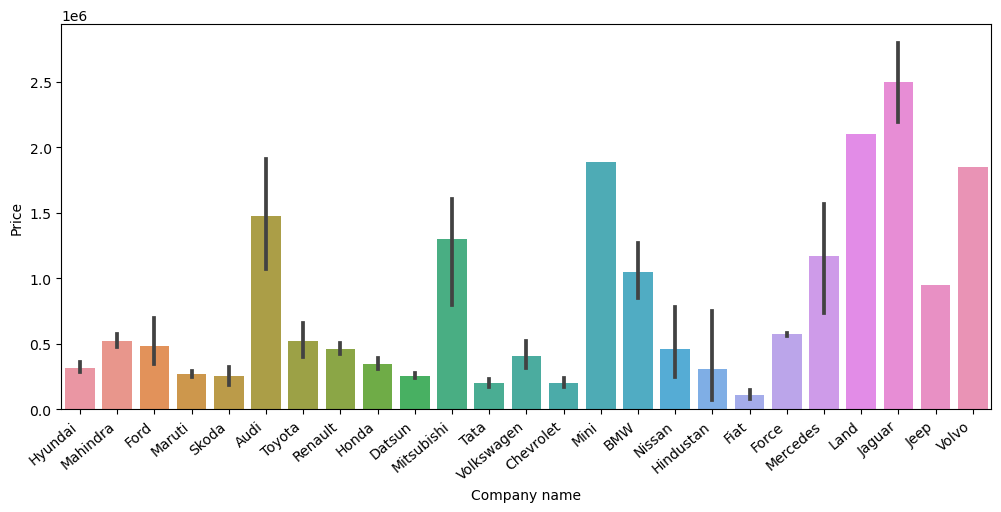

In [28]:
## Relationship of company with Price
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Company name',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

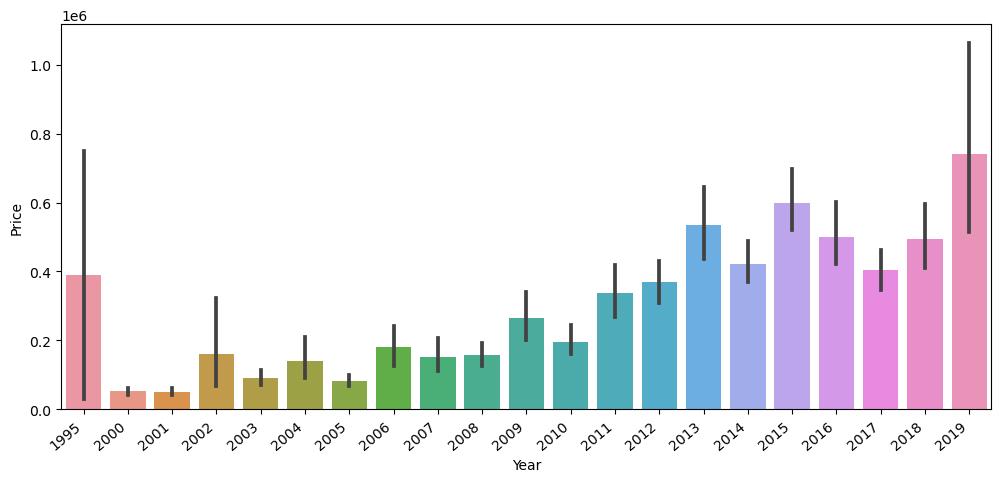

In [29]:
## Relationship of year with Price

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

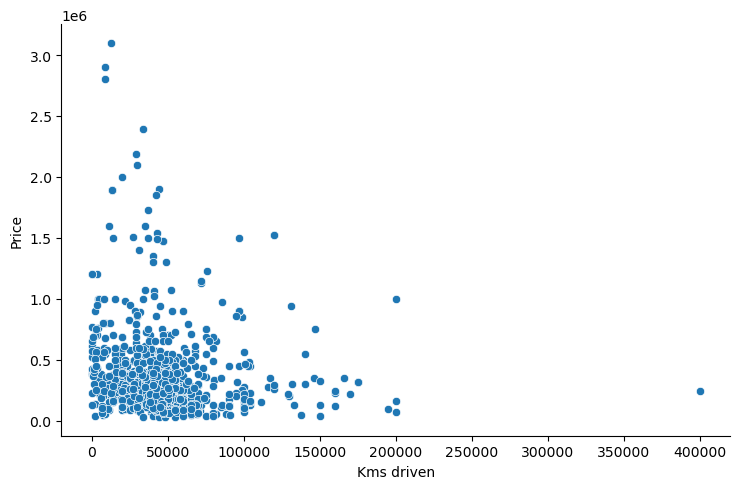

In [30]:
## Relationship of kms_driven with price

sns.relplot(x='Kms driven',y='Price',data=data,height=5,aspect=1.5)

<AxesSubplot:xlabel='Fuel_type', ylabel='Price'>

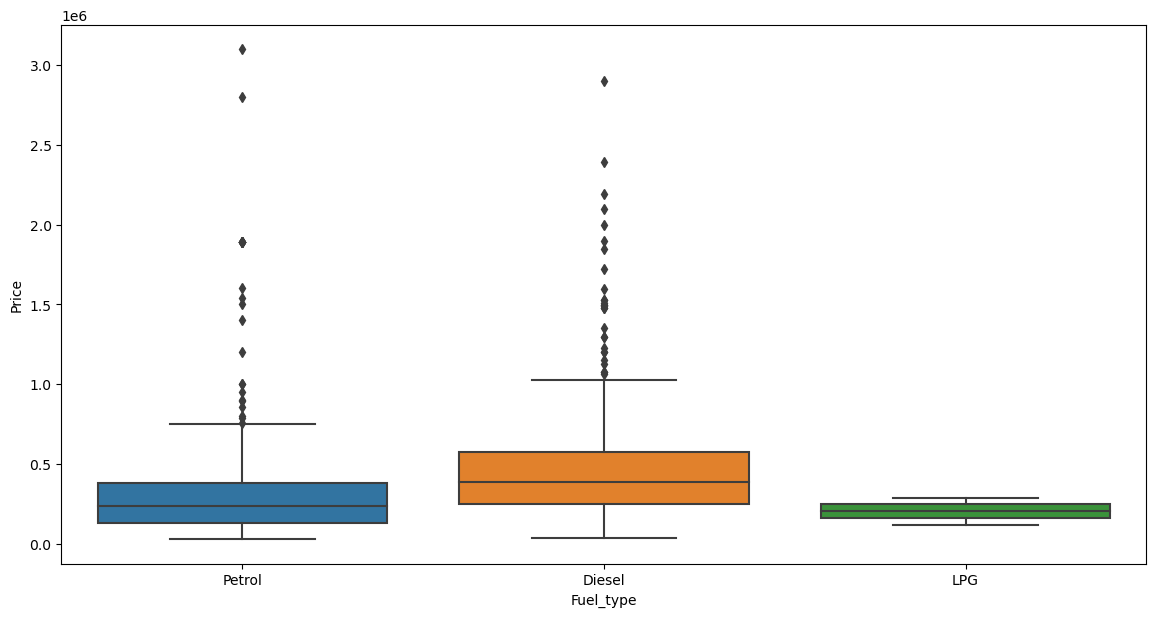

In [31]:
## relationship of fuel type with price

plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=data)

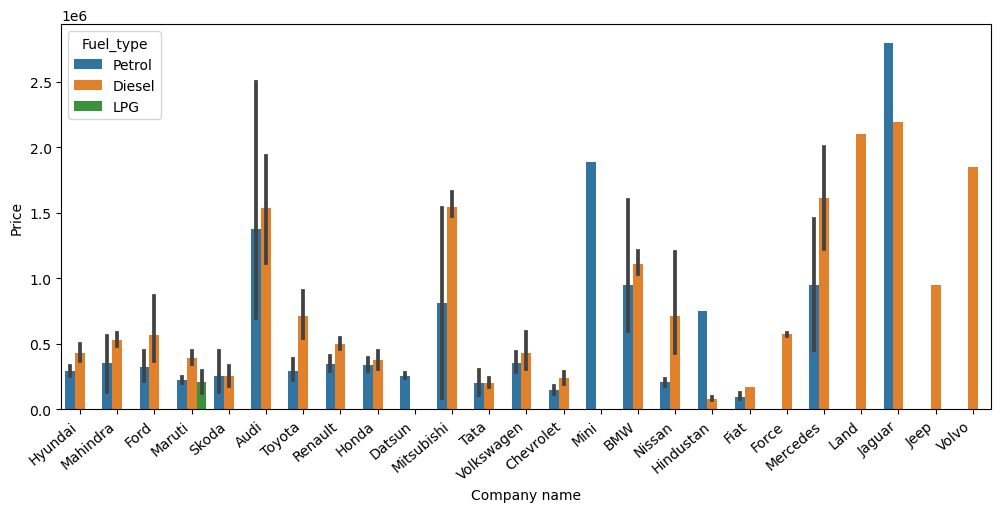

In [32]:
##Relationship of price with year and company 

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Company name',y='Price',data=data,hue='Fuel_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

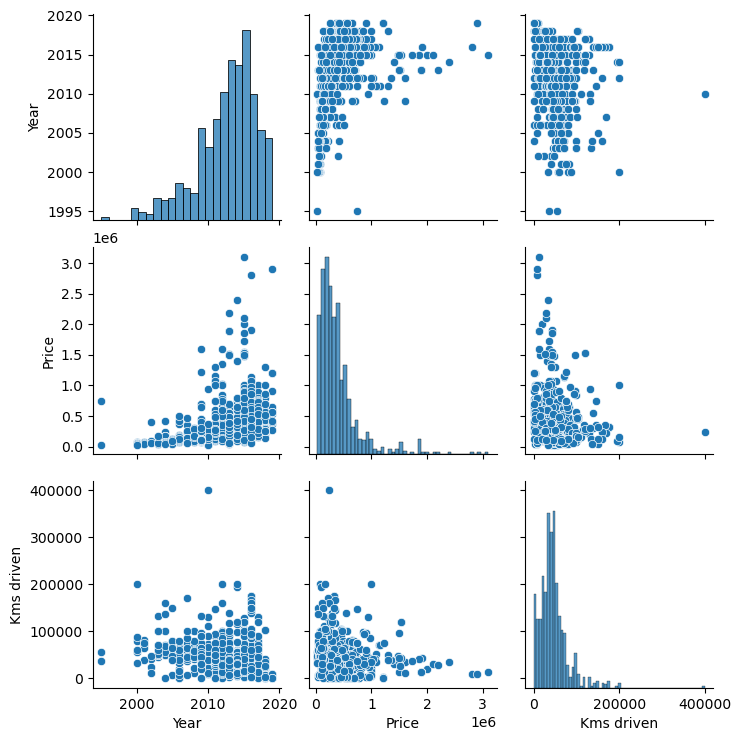

In [33]:
sns.pairplot(data)

In [34]:
## Defining x & y
x = data.drop(['Price'],axis=1)
y = data.Price

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((652, 5), (163, 5), (652,), (163,))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [38]:
oho = OneHotEncoder()
oho.fit(x[['Name of car','Company name','Fuel_type']])

OneHotEncoder()

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [40]:
column_trans = make_column_transformer((OneHotEncoder(categories=oho.categories_),['Name of car','Company name','Fuel_type']),remainder='passthrough')

In [41]:
lr = LinearRegression()

In [42]:
pipe = make_pipeline(column_trans,lr)

In [43]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [44]:
y_pred = pipe.predict(x_test)

In [45]:
y_pred

array([ 299491.75976451,  257913.45187604,  318703.08326951,
        380833.35151194,  250625.73048653,  223706.42168775,
       1083638.59849993,  453848.51009551,  444882.13645516,
       1790042.21536673,  277875.46543183,  508308.69607668,
        -45913.31355324,  433796.18357614,  340446.34821634,
        -95292.38500956,  142743.51872879,   98878.78924564,
        432765.26259384,  572653.23534673,  337275.35693573,
        448774.57958952,  191526.3271409 ,  244921.71443   ,
        407044.54544778,  453610.41570922,  268687.92409842,
       1513971.62156053,  276323.58833998,  142962.81644454,
        167220.06825589,  541648.37932284, 1675457.87139992,
        772800.83486194,  596127.13473051,  514220.24125075,
         56134.90067046,  383951.45839041,  553990.95124455,
        276739.2412979 ,  589486.90471793,  276170.56537159,
        604747.04111359,  138432.8951064 ,  365330.66405833,
        283939.91491367,   61132.41552438,  -31814.18030976,
        404432.64807665,

In [46]:
r2_score(y_test,y_pred)

0.31576272158462027

In [47]:
scores = []
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [48]:
np.argmax(scores)

4

In [49]:
scores[np.argmax(scores)]

0.8189003209843422

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.569999290976279